In [5]:
import pandas as pd
import os
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
import cv2

from urllib import request
import urllib
from io import BytesIO
import numpy as np
from skimage import io
from tqdm import tqdm


In [6]:
df = pd.read_csv("./csv/침구-커튼-러그/러그.csv")
df.head()

,PROD_ID,PROD_NM,LV0,LV1,LV2,IMG_URL,LV0_onehot,LV1_onehot,LV2_onehot
0,17619,독일 클라이네볼케 정품 카로 매트 (55*65),침구/커튼/러그,러그,발매트,https://image.hanssem.com/hsimg//gds/550/17/17...,[0 0 0 0 0 0 0 1 0],[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
1,24806,[바이빔]심플 러그-사각소형(3color),침구/커튼/러그,러그,베이직러그(솔리드),https://image.hanssem.com/hsimg//gds/550/24/24...,[0 0 0 0 0 0 0 1 0],[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
2,24812,[바이빔]심플 러그-원형(3color),침구/커튼/러그,러그,원형러그,https://image.hanssem.com/hsimg//gds/550/24/24...,[0 0 0 0 0 0 0 1 0],[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
3,27161,[바이빔]스타 러그-사각소형(4color),침구/커튼/러그,러그,베이직러그(솔리드),https://image.hanssem.com/hsimg//gds/550/27/27...,[0 0 0 0 0 0 0 1 0],[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
4,27162,[바이빔]스타 러그-사각중형(4color),침구/커튼/러그,러그,베이직러그(솔리드),https://image.hanssem.com/hsimg//gds/550/27/27...,[0 0 0 0 0 0 0 1 0],[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...


In [7]:
import pickle
import tensorflow as tf
with open("러그 feature.p", "rb") as f:
    inputs = pickle.load(f)
len(inputs)

5749

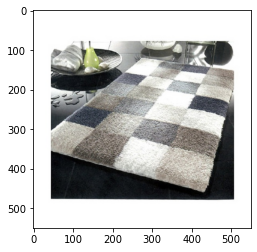

In [9]:
plt.imshow(inputs[0])